In [1]:
import urllib
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans

In [2]:
f = open('sona.txt', 'r')

In [3]:
content = f.read()

In [4]:
content

'\n\nKindly…\n\nSenate President Vicente Sotto III and the honorable members of the Senate; House Speaker Alan Peter Cayetano and the honorable members of the House of Representatives; Vice President Maria Leonor Robredo; former Presidents Joseph Ejercito Estrada and Gloria Macapagal-Arroyo; Chief Justice Diosdado Peralta and the justices of the Supreme Court; His Excellency Munther Mafoodh Salim Al-Mantheri and the esteemed members of the diplomatic corps; Executive Secretary Salvador Medialdea and the members of the Cabinet; mga mahal kong kababayan.\n\nWe live in a troubled time. Our dream of prosperity for our country was suddenly snuffed by a pandemic virulent virus. No nation was spared. Neither rich nor poor were exempt from the onslaught of this deadly disease.\n\nBut let us not despair. The vaccine is around the corner. Sooner and not later, the virus that gobbled up thousands of lives will itself be laid to rest.\n\nAdvertisement\n\nIn the meantime, let us express the nation’

In [35]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['set', 'shall', 'remain', 'wala', 'want', 'yan', 'tayo', \
                                               'said', 'really', 'iyan', 'para', 'lang', 'reiterate', 'ninyo', \
                                              'just', 'come', 'pati', 'like', 'pero', 'great', 'yung', 'ito', \
                                              'applause', 'ninyo', 'kung', 'natin', 'naman', 'kasi', 'ko', \
                                               'na', 'lahat', 'needed', 'ng', 'did', 'little', 'ang', 'itong', 'let', \
                                               'ano', 'sa', 'dito', 'eh', 'hindi', 'say', 'mo', 'ngayon', 'look', \
                                               'kayo', 'new', 'filipinos', 'times', 'mga', 'make', 'president',
                                              'implement', 'good', 'better'])
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1),stop_words=my_stop_words)
features = tfidf.fit_transform(list(content.split('\n')))

In [36]:
features

<361x78 sparse matrix of type '<class 'numpy.float64'>'
	with 704 stored elements in Compressed Sparse Row format>

In [37]:
d = tfidf.vocabulary_

In [38]:
from wordcloud import WordCloud

In [39]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [40]:
import numpy as np
from PIL import Image
import random
mask = np.array(Image.open("sona.png"))

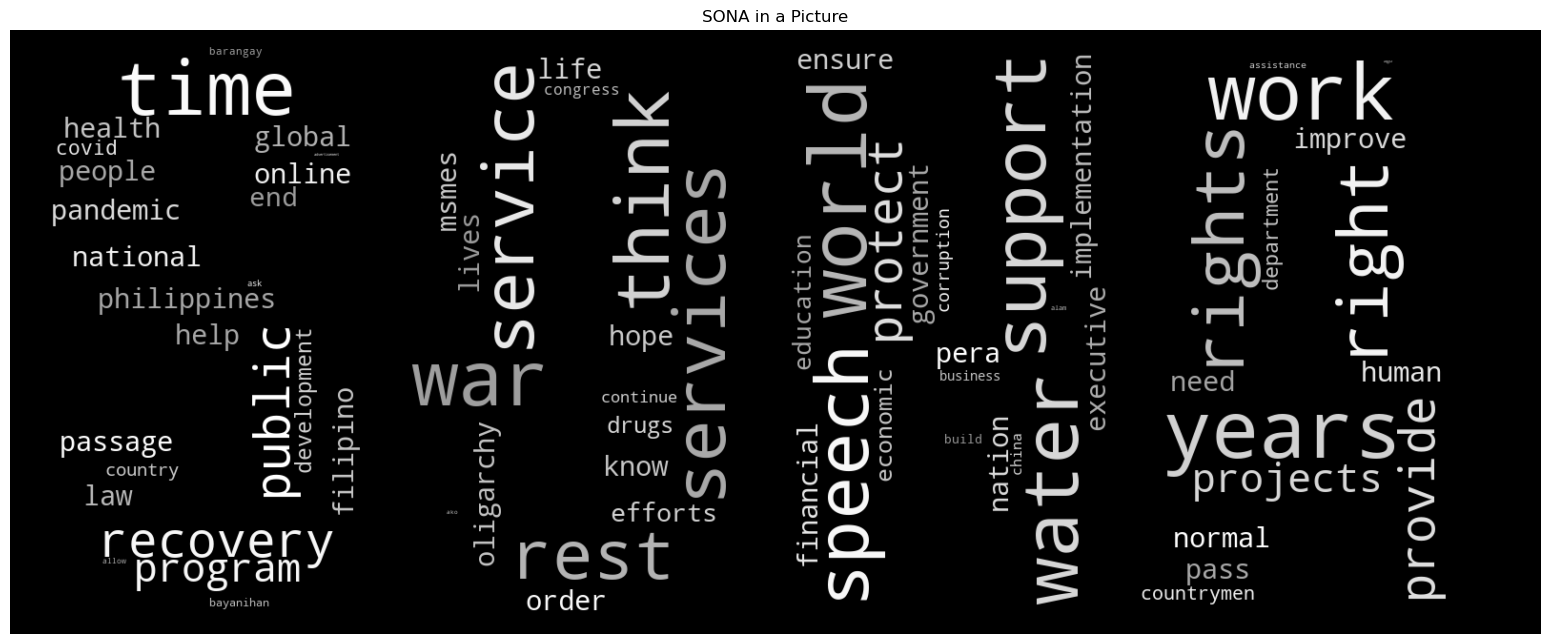

In [41]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="black",max_words=2000, margin=5, mask=mask)#,width = 1024,height = 720)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( dpi=100, figsize=(20, 8))
default_colors = wordcloud.to_array()
plt.title('SONA in a Picture')
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()